## Skin Cancer MNIST HAM10000 - EDA

In [1]:
#Import the necessary modules

import os
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
colors = sns.color_palette()

%matplotlib inline
plt.ion()   # interactive mode

import numpy as np
from PIL import Image
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
datadir = '/home/nishita/datasets/skin_mnist'

In [3]:
os.listdir(datadir) #list all files in dataset dir

['hmnist_8_8_L.csv',
 '.floydignore',
 'HAM10000_images_part_2',
 '.floyddata',
 'hmnist_8_8_RGB.csv',
 'HAM10000_metadata.csv',
 'floyd.yml',
 '.floydexpt',
 'HAM10000_images_part_1',
 'hmnist_28_28_L.csv',
 'hmnist_28_28_RGB.csv']

In [4]:
# match image_id to its path for all images in dataset
all_image_path = glob("/home/nishita/datasets/skin_mnist/*/*.jpg")
imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x for x in all_image_path}

# dict of lesion code to name
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

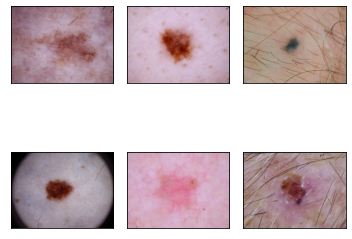

In [68]:
# visualize some sample images
w, h = 10, 10
fig = plt.figure(figsize=(5,5))
columns, rows = 3, 2
start, end = 0, len(imageid_path_dict)
ax = []
import random
for i in range(columns*rows):
    k = random.randint(start, end)
    img = mpimg.imread((all_image_path[k]))
    # create subplot and append to ax
    ax.append( fig.add_subplot(rows, columns, i+1) )
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)
plt.tight_layout()
plt.savefig('./images/sample_images.png')

In [6]:
# Checking the size and number of channels in a random sample image
arr = np.asarray(Image.open(all_image_path[10]))
arr.shape

(450, 600, 3)

In [7]:
# exploring the HAM10000_metadata 
df_original = pd.read_csv(os.path.join(datadir, 'HAM10000_metadata.csv')) #read csv file
df_original['path'] = df_original['image_id'].map(imageid_path_dict.get)   # map image_id to its path
df_original['cell_type'] = df_original['dx'].map(lesion_type_dict.get)     # map dx to name of lesion type
df_original['cell_type_idx'] = pd.Categorical(df_original['cell_type']).codes  # assign class codes for lesion types
df_original['cell_type_idx'].unique()

array([2, 4, 3, 6, 5, 1, 0], dtype=int8)

In [8]:
df_original.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,/home/nishita/datasets/skin_mnist/HAM10000_ima...,Benign keratosis-like lesions,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,/home/nishita/datasets/skin_mnist/HAM10000_ima...,Benign keratosis-like lesions,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,/home/nishita/datasets/skin_mnist/HAM10000_ima...,Benign keratosis-like lesions,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,/home/nishita/datasets/skin_mnist/HAM10000_ima...,Benign keratosis-like lesions,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,/home/nishita/datasets/skin_mnist/HAM10000_ima...,Benign keratosis-like lesions,2


In [9]:
print(f'Number of images: {len(df_original)}')  # total images

Number of images: 10015


In [10]:
# check class categories
df_original[['cell_type_idx', 'cell_type']].sort_values('cell_type_idx').drop_duplicates()

,cell_type_idx,cell_type
9804,0,Actinic keratoses
2528,1,Basal cell carcinoma
1018,2,Benign keratosis-like lesions
1159,3,Dermatofibroma
7050,4,Melanocytic nevi
2370,5,Vascular lesions
1577,6,dermatofibroma


`cell_type_idx` will be used for model training. We can check distribution of images over these classes.

In [11]:
df_original['cell_type'].value_counts()

Melanocytic nevi                  6705
dermatofibroma                    1113
Benign keratosis-like lesions     1099
Basal cell carcinoma               514
Actinic keratoses                  327
Vascular lesions                   142
Dermatofibroma                     115
Name: cell_type, dtype: int64

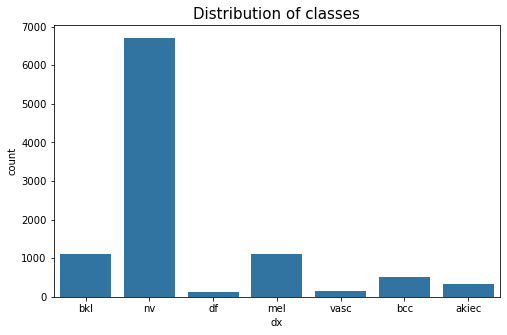

In [67]:
# Counts in each class
plt.figure(figsize=(8,5))
ax = sns.countplot(x='dx',data=df_original, color=colors[0])
plt.title('Distribution of classes', fontdict={'size': 15})
plt.savefig('./images/class_dist.png')

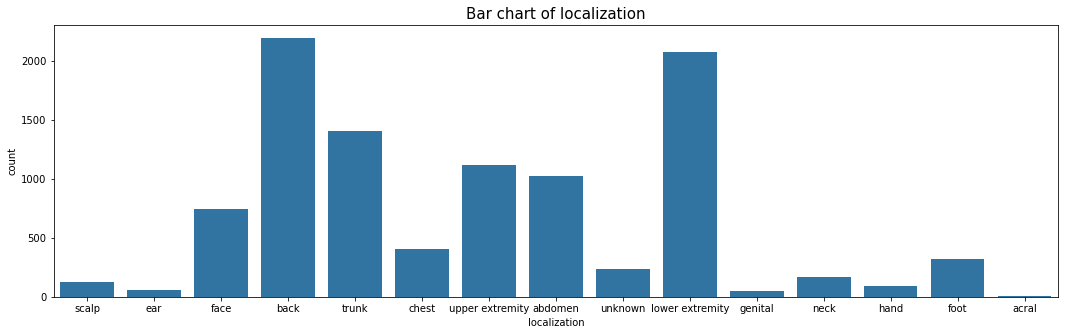

In [13]:
# Distribution of localization
plt.figure(figsize=(18,5))
ax = sns.countplot(x='localization',data=df_original, color=colors[0])
plt.title('Bar chart of localization', fontdict={'size': 15})
plt.show()

/home/nishita/anaconda3/envs/skin/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


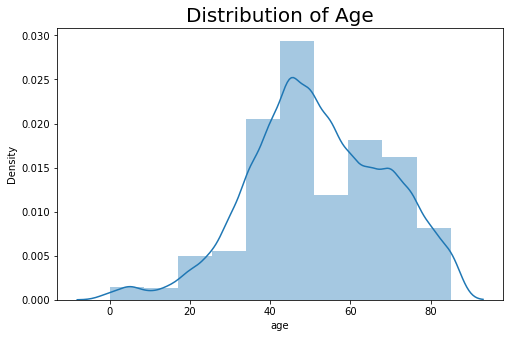

In [14]:
# Distribution of age
plt.figure(figsize=(8,5))
ax = sns.distplot(df_original['age'].dropna().values, 
                  bins=10, 
                  color=colors[0])
plt.title('Distribution of Age', fontdict={'size': 20})
plt.xlabel('age')
plt.show()

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64


NameError: name 'cv2' is not defined

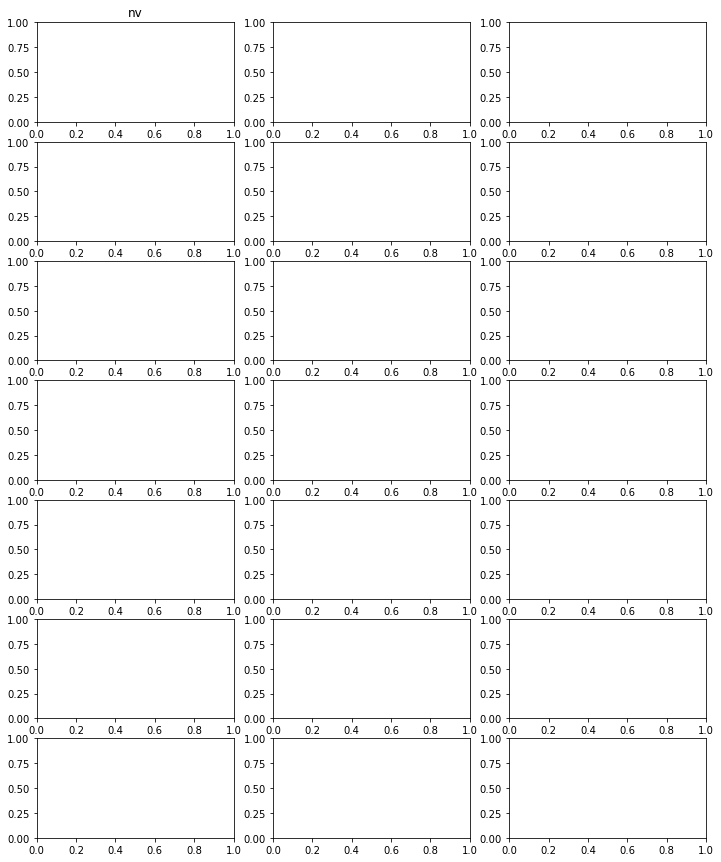

In [15]:
classes = df_original['dx'].value_counts()
print(classes)
n_samples = 3

# Visualizing images from each class
fig, ax = plt.subplots(len(classes), n_samples, figsize = (4*n_samples, 15))
for i in range(len(classes)):
    cls, sub_df = classes.index[i], df_original.loc[df_original['dx']==classes.index[i]]
    ax[i][0].set_title(cls)
    for j in range(n_samples):
        img = cv2.imread(sub_df['path'].iloc[j])
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        ax[i][j].imshow(img)
        ax[i][j].axis('off')

In [17]:
# Creating a new dataframe df_undup that contains only the non-duplicate elements.
df_undup = df_original.groupby('lesion_id').count()
df_undup.head()

,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx
lesion_id,,,,,,,,,
HAM_0000000,2,2,2,2,2,2,2,2,2
HAM_0000001,1,1,1,1,1,1,1,1,1
HAM_0000002,3,3,3,3,3,3,3,3,3
HAM_0000003,1,1,1,1,1,1,1,1,1
HAM_0000004,1,1,1,1,1,1,1,1,1


Some lesion_id's have more than 1 image associated with them. Let's separate the unduplicated ids

In [19]:
df_undup = df_undup[df_undup['image_id'] == 1]
df_undup.reset_index(inplace=True)
df_undup.head()
len(df_undup)

5514

In [20]:
# Create new column specifying duplicated or not
def duplicated_or_not(x):
    unique_list = list(df_undup['lesion_id'])
    if x in unique_list:
        return 'unduplicated'
    else:
        return 'duplicated'
df_original['duplicates'] = df_original['lesion_id']
df_original['duplicates'] = df_original['duplicates'].apply(duplicated_or_not)
df_original.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx,duplicates
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,/home/nishita/datasets/skin_mnist/HAM10000_ima...,Benign keratosis-like lesions,2,duplicated
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,/home/nishita/datasets/skin_mnist/HAM10000_ima...,Benign keratosis-like lesions,2,duplicated
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,/home/nishita/datasets/skin_mnist/HAM10000_ima...,Benign keratosis-like lesions,2,duplicated
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,/home/nishita/datasets/skin_mnist/HAM10000_ima...,Benign keratosis-like lesions,2,duplicated
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,/home/nishita/datasets/skin_mnist/HAM10000_ima...,Benign keratosis-like lesions,2,duplicated


In [21]:
#creating the unduplicated dataframe
df_undup = df_original[df_original['duplicates'] == 'unduplicated']
df_undup.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx,duplicates
10,HAM_0001396,ISIC_0025276,bkl,histo,55.0,female,trunk,/home/nishita/datasets/skin_mnist/HAM10000_ima...,Benign keratosis-like lesions,2,unduplicated
15,HAM_0007207,ISIC_0031326,bkl,histo,65.0,male,back,/home/nishita/datasets/skin_mnist/HAM10000_ima...,Benign keratosis-like lesions,2,unduplicated
20,HAM_0006071,ISIC_0032343,bkl,histo,70.0,female,face,/home/nishita/datasets/skin_mnist/HAM10000_ima...,Benign keratosis-like lesions,2,unduplicated
33,HAM_0005612,ISIC_0024981,bkl,histo,80.0,male,scalp,/home/nishita/datasets/skin_mnist/HAM10000_ima...,Benign keratosis-like lesions,2,unduplicated
34,HAM_0005388,ISIC_0027815,bkl,histo,80.0,male,chest,/home/nishita/datasets/skin_mnist/HAM10000_ima...,Benign keratosis-like lesions,2,unduplicated


In [22]:
len(df_undup) 

5514

In [23]:
df_original['duplicates'].value_counts()

unduplicated    5514
duplicated      4501
Name: duplicates, dtype: int64

We need to split the 10015 images into training and validation set. The training set can contain duplicated images but not the validation (or test) set. Hence, we choose validation images from the unduplicated ids and the rest can go to the training set.

In [24]:
#Create the validation dataframe
labels = df_undup['cell_type_idx']
#labels
_, df_temp = train_test_split(df_undup, test_size=0.3, random_state=42, stratify=labels)
df_temp.shape

(1655, 11)

In [25]:
# Assign val or train status to lesion_ids

def get_val_rows(x): 
    val_list = list(df_temp['image_id'])
    if str(x) in val_list:
        return 'val'
    else:
        return 'train'


df_original['train_or_val'] = df_original['image_id']
df_original['train_or_val'] = df_original['train_or_val'].apply(get_val_rows)
# filter out train rows
df_train = df_original[df_original['train_or_val'] == 'train']
print(len(df_train))

8360


In [ ]:
df_train.head()

In [26]:
# Split the temp dataframe further to create test and val
df_val, df_test = train_test_split(df_temp, test_size=0.5, random_state=42)
df_val.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx,duplicates
3143,HAM_0003217,ISIC_0029888,nv,follow_up,65.0,female,lower extremity,/home/nishita/datasets/skin_mnist/HAM10000_ima...,Melanocytic nevi,4,unduplicated
4169,HAM_0006860,ISIC_0032500,nv,follow_up,40.0,male,upper extremity,/home/nishita/datasets/skin_mnist/HAM10000_ima...,Melanocytic nevi,4,unduplicated
4901,HAM_0005423,ISIC_0025503,nv,follow_up,40.0,male,trunk,/home/nishita/datasets/skin_mnist/HAM10000_ima...,Melanocytic nevi,4,unduplicated
5981,HAM_0004313,ISIC_0026924,nv,follow_up,50.0,female,abdomen,/home/nishita/datasets/skin_mnist/HAM10000_ima...,Melanocytic nevi,4,unduplicated
6251,HAM_0001802,ISIC_0030224,nv,follow_up,55.0,female,abdomen,/home/nishita/datasets/skin_mnist/HAM10000_ima...,Melanocytic nevi,4,unduplicated


In [ ]:
df_test.head()

In [ ]:
df_test = df_test.reset_index()
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index()

In [ ]:
df_train.shape

In [ ]:
df_val.shape

In [ ]:
df_test.shape

We now have three dataframes for train, val and test each with a 70/15/15% split. Validation and test set only have unduplicated images, training set has duplicated images as well.

In [ ]:
df_train['cell_type_idx'].value_counts()

In [ ]:
df_val['cell_type'].value_counts()

In [ ]:
df_test['cell_type'].value_counts()